In [10]:
# Imports 

import numpy as np 
import pandas as pd 
import os 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# Import Dataset 

data = pd.read_csv('./Datasets/outlook.csv')

In [3]:
# encoding the dataset to integers using an encoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] =  le.fit_transform(data[col])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  14 non-null     int64
 1   Wind         14 non-null     int64
 2   Outlook      14 non-null     int64
 3   Humidity     14 non-null     int64
 4   Outcome      14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [5]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

print(X.shape,y.shape)

(14, 4) (14,)


In [6]:
# splitting the data

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,stratify=y)

# Regular Tree

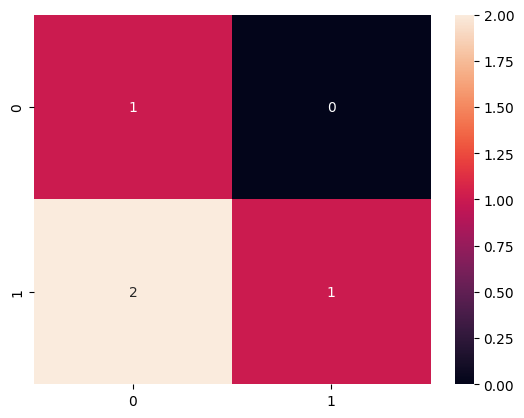

Regular Tree ACC: 0.5


In [7]:
clf = tree.DecisionTreeClassifier(random_state = 0)
clf.fit(X_tr,y_tr)

y_pred = clf.predict(X_ts)
cm  = confusion_matrix(y_ts,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

print('Regular Tree ACC:',accuracy_score(y_ts,y_pred))

# Pruned Tree

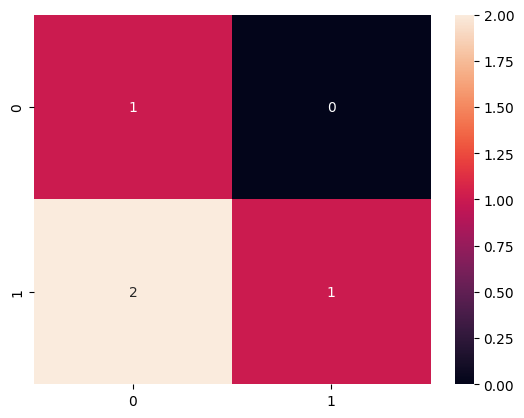

Pruned Tree ACC: 0.5


In [8]:
# pruning the tree 

pr_clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 2)
pr_clf.fit(X_tr, y_tr)

y_pred = pr_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Pruned Tree ACC:',accuracy_score(y_ts,y_pred))



# Random Forest

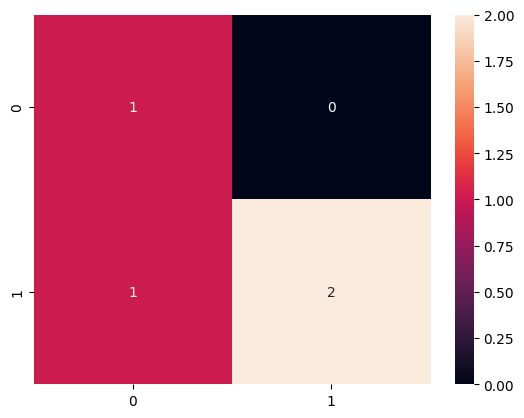

Random Forest ACC: 0.75


In [11]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators=10)

rf_clf.fit(X_tr,y_tr)

y_pred = rf_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Random Forest ACC:',accuracy_score(y_ts,y_pred))
